In [52]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib as mpl
from datetime import datetime
import pandas as pd
import zipfile
from io import BytesIO
import requests
from scipy.stats import ttest_1samp
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.  survived : 생존=1, 죽음=0
2.  pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
3.  sibsp : 함께 탑승한 형제 또는 배우자 수
4.  parch : 함께 탑승한 부모 또는 자녀 수
5.  ticket : 티켓 번호
6.  cabin : 선실 번호
7.  embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
출처: https://kongda.tistory.com/86 [콩다코딩:티스토리]

In [84]:
csv_file_path1 = '/content/drive/MyDrive/빅데이터/자료/train.csv'
csv_file_path2 = '/content/drive/MyDrive/빅데이터/자료/test.csv'
train = pd.read_csv(csv_file_path1)
test = pd.read_csv(csv_file_path2)

In [128]:
test.info()
test.fillna(test['Fare'].mean(),inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    object 
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
 5   Family_size  418 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.7+ KB


In [100]:
result1 = train.groupby('Pclass')['Parch'].agg(['sum', 'min', 'mean'])
result2 = train.groupby('Pclass')['Age'].agg(['sum', 'min', 'mean'])
result3 = train.groupby('Pclass')['SibSp'].agg(['sum', 'min', 'mean'])
result_concat = pd.concat([result1, result2,result3])
result_concat

,sum,min,mean
Pclass,,,
1,77.00,0.00,0.356481
2,70.00,0.00,0.380435
3,193.00,0.00,0.393075
1,7111.42,0.92,38.233441
2,5168.83,0.67,29.877630
3,8924.92,0.42,25.140620
1,90.00,0.00,0.416667
2,74.00,0.00,0.402174
3,302.00,0.00,0.615071


In [102]:

#필요없는 cabin 변수 삭제
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [103]:
#'Age'의 결측치를 pclass 와 sex의 평균나이에 맞춰서 채워준다
train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(['Pclass','Sex'])['Age'].transform(lambda x : x.fillna(x.mean()))


In [104]:
#Embarked는 결측치가 2개 뿐이므로 제일 많은 변수를 결측치로 채운다
print(train['Embarked'].value_counts())
print(test['Embarked'].value_counts())
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=test['Embarked'].fillna('S')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [105]:
#배우자 수와 부모 수를 합쳐서 가족 수 변수를 만든다
train['Family_size'] = train['SibSp'] + train['Parch']
test['Family_size'] = test['SibSp'] + test['Parch']
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)


In [106]:
pivot_table = pd.pivot_table(train, values='Fare', index=['Pclass','Age','Parch'], aggfunc='max')
print(pivot_table)

KeyError: 'Parch'

In [107]:
# 도착지가 C인곳의 생존률이 높다

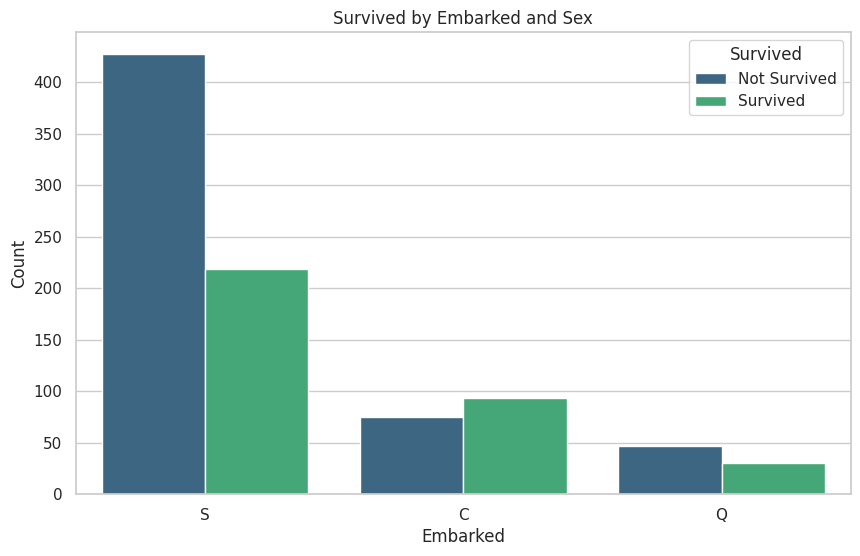

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 스타일 설정
sns.set(style="whitegrid")

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='viridis', dodge=True)

# 그래프 제목과 축 레이블 설정
plt.title('Survived by Embarked and Sex')
plt.xlabel('Embarked')
plt.ylabel('Count')

# 범례 추가
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])



In [111]:
#Pclass 의 등급을 숫자가 아닌 문자형으로 바꿔주는 작업
t={1:'first',
   2:'second',
   3:'third'}
train['Pclass']=[t[m] for m in train['Pclass']]
test['Pclass']=[t[m] for m in test['Pclass']]


In [112]:
train.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [120]:

test

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,third,male,34.500000,7.8292,Q,0
1,third,female,47.000000,7.0000,S,1
2,second,male,62.000000,9.6875,Q,0
3,third,male,27.000000,8.6625,S,0
4,third,female,22.000000,12.2875,S,2
...,...,...,...,...,...,...
413,third,male,24.525104,8.0500,S,0
414,first,female,39.000000,108.9000,C,0
415,third,male,38.500000,7.2500,S,0
416,third,male,24.525104,8.0500,S,0


In [130]:

def train_and_predict(train, test):
    # 훈련 데이터 전처리
    train_features = train[['Pclass', 'Sex', 'Age','Embarked', 'Fare','Family_size']]
    train_target = train['Survived']
    train_features = pd.get_dummies(train_features, columns=['Sex', 'Embarked','Pclass'], drop_first=True)

    # 테스트 데이터 전처리
    test_features = test[['Pclass', 'Sex', 'Age','Embarked', 'Fare','Family_size']]
    test_features = pd.get_dummies(test_features, columns=['Sex', 'Embarked','Pclass'], drop_first=True)
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

    # 분류 모델 정의 및 훈련
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # 모델 예측
    predictions = model.predict(X_test)

    # 성능 평가
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")

    # 분류 보고서 출력
    print(classification_report(y_test, predictions))

    # 테스트 데이터에 대한 예측 수행
    test_predictions = model.predict(test_features)

    test['Survived'] = test_predictions

    total_passengers = len(test_predictions)

    survived_passengers = test['Survived'].sum()

    survival_rate = survived_passengers / total_passengers * 100
    return survival_rate

In [131]:
train_and_predict(train,test)

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       105
           1       0.85      0.81      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.86      0.86      0.86       179



35.16746411483253